In [165]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# Step 1: Load the dataset into a Pandas DataFrame.

In [166]:
df=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Step 2: Explore the dataset.

In [167]:
df.shape

(1025, 14)

In [168]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [169]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [170]:
df_heart_disease = df[df['target'] == 1]['chol']
df_heart_disease

5       248
10      149
12      210
15      210
16      308
       ... 
1011    308
1014    141
1019    204
1020    221
1023    254
Name: chol, Length: 526, dtype: int64

In [171]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [172]:
df_no_heart_disease = df[df['target'] == 0]['chol']
df_no_heart_disease

0       212
1       203
2       174
3       203
4       294
       ... 
1017    282
1018    172
1021    258
1022    275
1024    188
Name: chol, Length: 499, dtype: int64

In [173]:
df_heart_disease_mean = df_heart_disease.mean()
df_heart_disease_mean

240.97908745247148

In [174]:
df_no_heart_disease_mean = df_no_heart_disease.mean()
df_no_heart_disease_mean

251.2925851703407

 # Step 3: Explore the distribution of variables and relationships between them

In [175]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


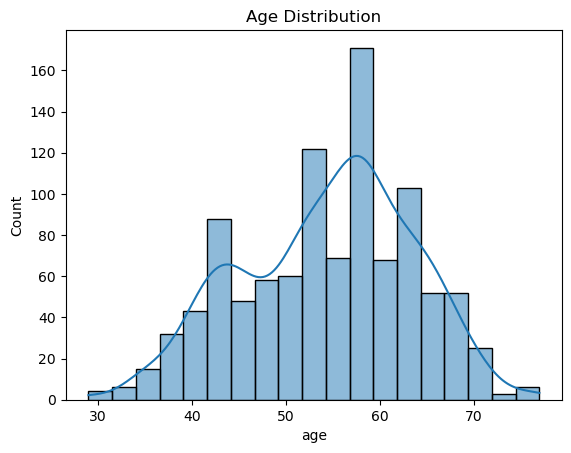

In [176]:
# Example of plotting some variables for EDA
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()


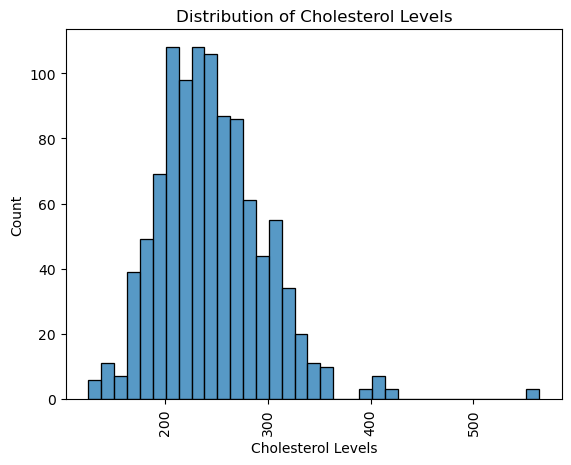

In [177]:
sns.histplot(x='chol', data=df)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Levels')
plt.xticks(rotation=90)
plt.show()


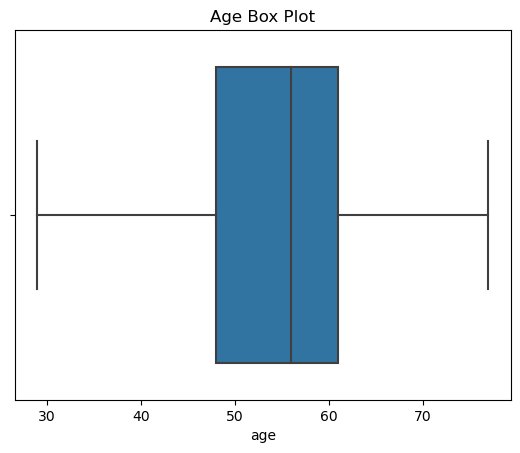

In [178]:
sns.boxplot(x='age', data=df)
plt.title('Age Box Plot')
plt.show()


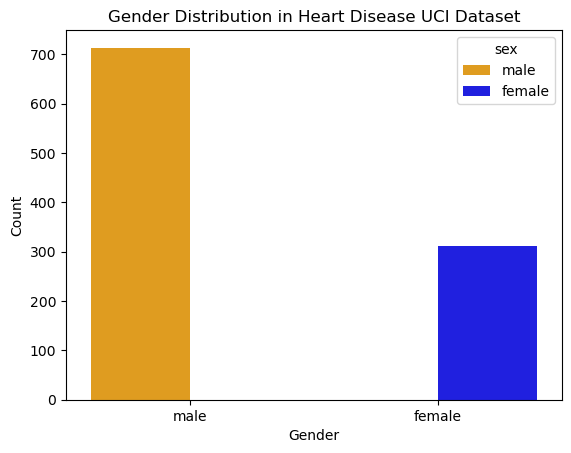

In [179]:
df['sex'] = df['sex'].map({0: 'female', 1: 'male'})
sns.countplot(x='sex', data=df, hue='sex', palette={'female': 'blue', 'male': 'orange'})
# Customize the plot
plt.title('Gender Distribution in Heart Disease UCI Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

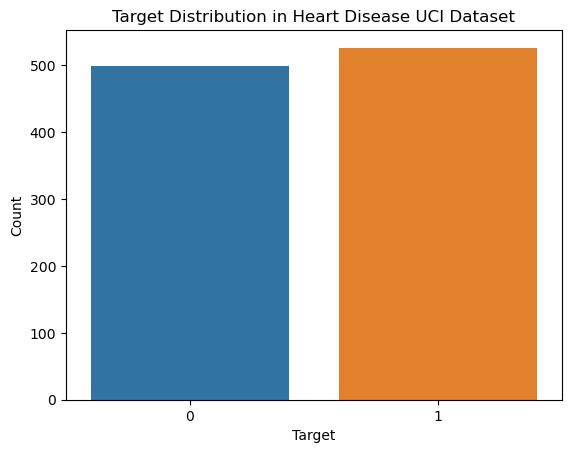

In [180]:
sns.countplot(x='target', data=df)

# Customize the plot
plt.title('Target Distribution in Heart Disease UCI Dataset')
plt.xlabel('Target')
plt.ylabel('Count')

# Display the plot
plt.show()

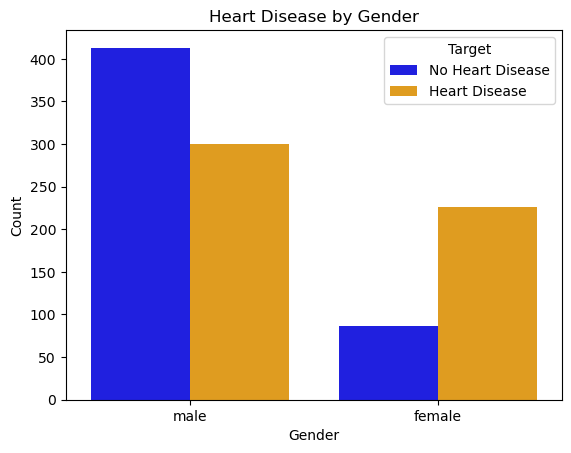

In [181]:
# Use the countplot function and set 'sex' as the 'x' parameter, 'hue' to 'target'
sns.countplot(x='sex', hue='target', data=df, palette={0: 'blue', 1: 'orange'})

# Customize the plot
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])

# Display the plot
plt.show()

# hypothesis

In [182]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(df_heart_disease, df_no_heart_disease)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -3.213433097179175
P-value: 0.0013525712504626976


In [183]:
print("P-value:", p_value)
if p_value < 0.05:
    print("There is a significant difference in cholesterol levels between patients with and without heart disease.")
else:
    print("There is no significant difference in cholesterol levels between patients with and without heart disease.")


P-value: 0.0013525712504626976
There is a significant difference in cholesterol levels between patients with and without heart disease.


In [184]:
# Calculate confidence intervals for relevant variables (cholesterol levels)
confidence_interval_heart_disease = stats.t.interval(0.95, len(df_heart_disease) - 1, loc=df_heart_disease.mean(), scale=stats.sem(df_heart_disease))
confidence_interval_no_heart_disease = stats.t.interval(0.95, len(df_no_heart_disease) - 1, loc=df_no_heart_disease.mean(), scale=stats.sem(df_no_heart_disease))

In [185]:
confidence_interval_heart_disease

(236.438435496363, 245.51973940857994)

In [186]:
confidence_interval_no_heart_disease

(246.9336896954613, 255.65148064522006)

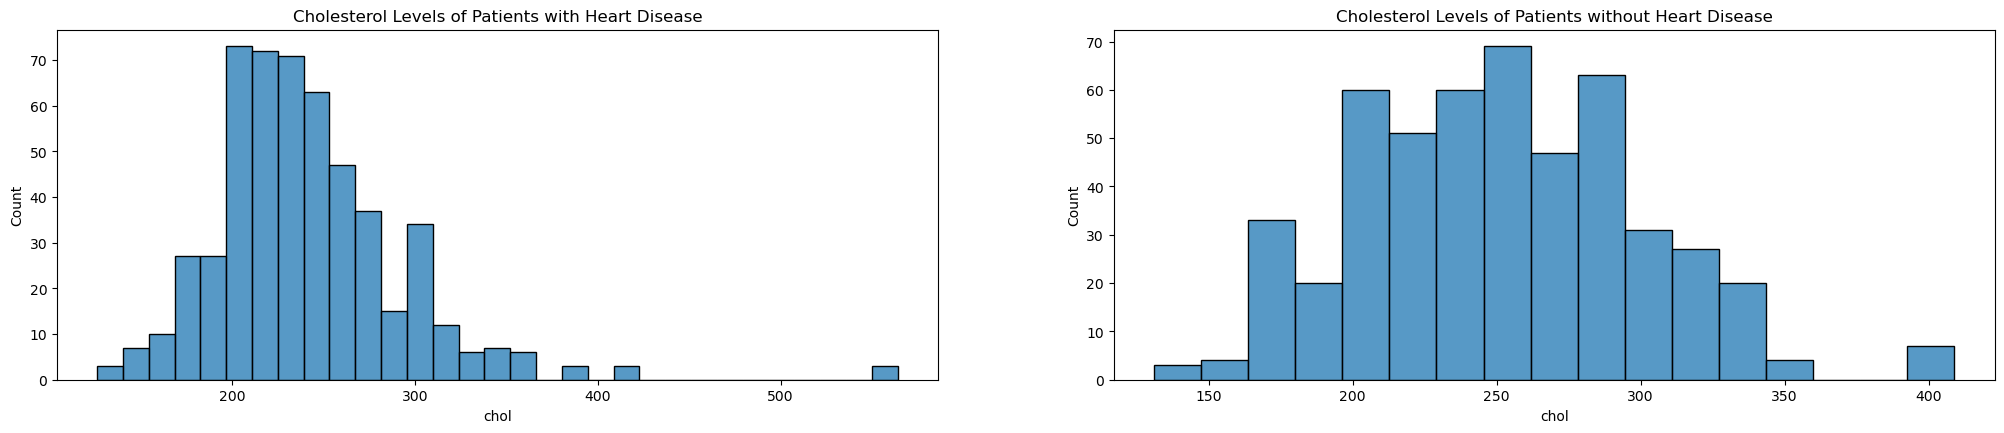

In [187]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 2, 1)
sns.histplot(df_heart_disease)
plt.title('Cholesterol Levels of Patients with Heart Disease')
plt.subplot(2, 2, 2)
sns.histplot(df_no_heart_disease)
plt.title('Cholesterol Levels of Patients without Heart Disease')
plt.show()


In [189]:
# Summarize the findings
print("Hypothesis Test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

print("\nConfidence Intervals for Cholesterol Levels:")
print("Heart Disease Group:", confidence_interval_heart_disease)
print("No Heart Disease Group:", confidence_interval_no_heart_disease)

Hypothesis Test Results:
T-statistic: -3.213433097179175
P-value: 0.0013525712504626976

Confidence Intervals for Cholesterol Levels:
Heart Disease Group: (236.438435496363, 245.51973940857994)
No Heart Disease Group: (246.9336896954613, 255.65148064522006)


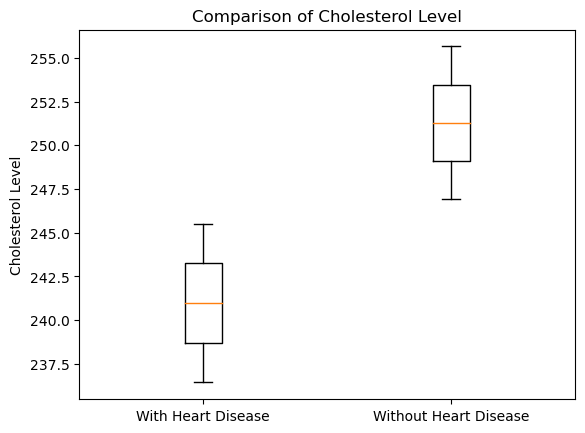

In [192]:
plt.boxplot([confidence_interval_heart_disease,confidence_interval_no_heart_disease], labels=['With Heart Disease','Without Heart Disease'])
plt.ylabel('Cholesterol Level')
plt.title('Comparison of Cholesterol Level')
plt.show()